In [326]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [328]:
data = pd.read_csv("/Users/djosue27/OneDrive/Big Data XTOL/Module 5/Task 4/Consolidated.csv", header=0)

In [329]:
del data['resultId']

In [330]:
del data['constructor']

In [331]:
del data['drivername']

In [332]:
del data['status']

In [333]:
del data['time_of_day']

In [334]:
del data['name']

In [335]:
del data['constructor_country']

In [336]:
del data['driver_country']

In [337]:
del data['country']

In [338]:
data['position'] = data['position'].astype(object)

In [339]:
del data['date']

In [340]:
del data['birth_date']

In [341]:
del data['milliseconds']

In [342]:
data = data.dropna()

In [343]:
data.head()

,raceId,year,month,driverId,age_at_race,constructorId,number,grid,points,laps,statusId,position
0,748,1960,5,509,31,107,4,2,8.0,200,1,1
1,748,1960,5,449,39,107,1,3,6.0,200,1,2
2,748,1960,5,510,34,108,99,26,4.0,200,1,3
3,748,1960,5,511,39,109,7,8,3.0,200,1,4
4,748,1960,5,512,38,110,3,17,2.0,200,1,5


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9253 entries, 0 to 10691
Data columns (total 12 columns):
raceId           9253 non-null int64
year             9253 non-null int64
month            9253 non-null int64
driverId         9253 non-null int64
age_at_race      9253 non-null int64
constructorId    9253 non-null int64
number           9253 non-null int64
grid             9253 non-null int64
points           9253 non-null float64
laps             9253 non-null int64
statusId         9253 non-null int64
position         9253 non-null object
dtypes: float64(1), int64(10), object(1)
memory usage: 939.8+ KB


In [345]:
features = data.iloc[:,0:11]

In [346]:
#dependent variable
dep = data['position']

In [347]:
#Training Set (Feature Space: X Training)
X_train = (features[: 6000])
X_train.head()

,raceId,year,month,driverId,age_at_race,constructorId,number,grid,points,laps,statusId
0,748,1960,5,509,31,107,4,2,8.0,200,1
1,748,1960,5,449,39,107,1,3,6.0,200,1
2,748,1960,5,510,34,108,99,26,4.0,200,1
3,748,1960,5,511,39,109,7,8,3.0,200,1
4,748,1960,5,512,38,110,3,17,2.0,200,1


In [348]:
#Dependent Variable Training Set (Y Training)
y_train = dep[: 6000]
y_train_count = len(y_train.index)
print('Num of observations in Y training are:',str(y_train_count))

Num of observations in Y training are: 6000


In [349]:
#Testing Set (X Testing)
X_test = features[-1000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 1000
      raceId  year  month  driverId  age_at_race  constructorId  number  grid  \
8493     992  2018      4         8           38              6       7     6   
8494     992  2018      4       815           28             10      11     8   
8495     992  2018      4        20           30              6       5     1   
8496     992  2018      4       832           23              4      55     9   
8497     992  2018      4       844           20             15      16    13   

      points  laps  statusId  
8493    18.0    51         1  
8494    15.0    51         1  
8495    12.0    51         1  
8496    10.0    51         1  
8497     8.0    51         1  


In [350]:
#Ground Truth (y_test) 
y_test = dep[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


8493    2
8494    3
8495    4
8496    5
8497    6
Name: position, dtype: object

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [352]:
X_train.shape, X_test.shape

((4500, 11), (1500, 11))

In [353]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression(n_jobs = 10)

In [354]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [355]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [356]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [357]:
print(cross_val_score(modelRF, X_train, y_train))

[0.93943915 0.93506585 0.93830017 0.95387479 0.93296469]


In [358]:
print(cross_val_score(modelLR, X_train, y_train))

[0.82377157 0.80863684 0.820686   0.79908646 0.80186937]


In [359]:
print(cross_val_score(modelSVR, X_train, y_train))

[0.21085983 0.17978461 0.21709946 0.26067879 0.1904267 ]


In [360]:
modelSVR.score(X_train, y_train)

0.2283521491108408

In [361]:
modelLR.score(X_train, y_train)

0.814698261619441

In [362]:
modelRF.score(X_train, y_train)

0.9917502279405507

In [376]:
predictions = modelRF.predict(X_test)

In [377]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [378]:
predRsquared = r2_score(y_test,predictions)

In [379]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.949
RMSE: 1.116


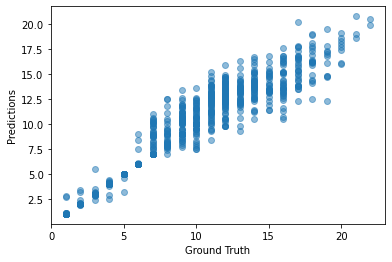

In [380]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();